# PIA 
## Grupo 001 Minería de datos  
Lunes 7:00-10:00pm  
  
## Equipo 5:  
1844452 - Castillo Rodríguez, Leonardo Daniel  
1851642 - Cedillo Charles, Hector  
1877422 - Martinez Ortuño, Gustavo Juan  
1869864 - Morales Salazar, César Alejandro  
1851701 - Navarrete Rosales, Jose Eduardo  

# *European Soccer Score Card Database*  
## Información de la base de datos
1. [Título de la base de datos](#1)
2. [Descripción de los datos](#2)
3. [Justificación del uso de datos](#3)
4. [Objetivos](#4)
  
## Desarrollo
5. [Limpieza de datos](#5)
6. [Estadística básica de los datos](#6)
7. [Gráficas](#7)
8. [Técnica de minería](#8)
  
## Resultados Finales
9. [Resultados Finales](#9)
  
## Conclusión Final  
10. [Conclusión](#10)

<a id="1"></a> <br>
### 1. Título de la base de datos  
**a)** European Soccer Score Card Database.  
  
**b)** Url: https://www.kaggle.com/omercolakoglu/european-soccer-score-card-database  

<a id="2"></a> <br>
### 2. Descripción de los datos  
**a) Tipo de datos**  
La base de datos está compuesta por una tabla de 74 columnas. En dicha base de datos se encuentran almacenados los datos históricos de una gran cantidad de jugadores importantes en el futbol soccer, de los cuales se almacenaron las estadísticas de cada uno de ellos.  
  
**b) Descripción de las columnas**  
Las columnas están separadas en diferentes tipos de datos; los datos más predominantes son del tipo entero, ya que están almacenados los números estadísticos de cada futbolista, tales como la cantidad de goles anotados (de tiro libre, penal, etc.), partidos jugados, partidos ganados, etc. Asimismo, también tenemos columnas donde se almacenan datos del tipo flotante, tales como los porcentajes de pases efectivos, promedio de goles anotados por partido, etc. Y finalmente columnas con datos del tipo object, donde se almacenan los nombres de los jugadores, clubes a los que pertenecieron, etc. Para el trabajo que se llevará a cabo nos podemos auxiliar en varias de las columnas mencionadas anteriormente, sin embargo, si tuvieramos que elegir columnas con los datos más relevantes para nuestro trabajo podriamos mencionar las victorias de un jugador, su cantidad de goles y su efectividad de pase.  

<a id="3"></a> <br>
### 3. Justificación del uso de los datos
**a) Características que han llamado la atención:** Resulta interesante trabajar con esta base debido a que los datos que contiene corresponden a medidas de desempeño de los jugadores de una liga de futbol, y destaca el hecho de que hay una cantidad importante de estos datos correspondientes a un mismo jugador, lo cual parece atractivo de analizar en cuanto a que estos podrían ser poco dispersos. Aunado a esto, quienes realizan el análisis muestran un gran interés por dicho análisis debido a que el tema es algo que corresponde a sus gustos personales.  
  
**b) Qué beneficio encuentran al trabajar con estos datos:** En primer lugar, al tratarse de una base extensa, es prudente pensar que puede brindar información suficiente para llegar a conclusiones precisas respecto a los objetivos planteados en este mismo documento. Por otro lado, podemos mencionar el supuesto que seamos visores, y que trabajasemos para algun club con una cantidad de dinero excepcional, y busquemos algun jugador que cumpla ciertas características específicas, ya sea un promedio de goles por partido encima de la media, una cantidad de pases efectivos mayor a la de un jugador que tenemos actualmente en el club entre otras cosas. Además, como se ha mencionado anteriormente, al tratarse de datos que probablemente sean poco dispersos (debido a que hay múltiples registros de un mismo jugador), la veracidad de las conclusiones también resulta más confiable. Por último, el hecho de que la base cuente con una cantidad extensa de columnas (que corresponden a criterios que evalúan este desempeño de los jugadores) también brinda confianza a las conclusiones que se obtienen de su análisis.  

<a id="4"></a> <br>
### 4. Objetivo final
**Objetivo principal:**  
Conocer las características de los mejores jugadores por posición de las diferentes ligas europeas en cuanto a números y estadísticas se refiere de los últimos años, para poder realizar la mejor decisión posible al momento de hacer una contratación.  
  
**Objetivos secundarios:**  

* Conocer un promedio de edad de los jugadores que militan en Europa  
* Conocer cuál es la mejor liga del mundo en base a la competitividad de la misma  

<a id="5"></a> <br>
## Limpieza de datos

* **Importar librerías y base de datos**

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dire=os.getcwd()+'\\PIA\\BASES_PIA\\Soccer\\'
base_soccer=pd.read_table(dire+'Euro_Soccer_Player_Scorecard.csv', sep=',')

* **Visualizar los datos**

In [3]:
base_soccer

,ROWID,PLAYERID,PID,PLAYERNR,PLAYER_NAME,BIRTHDATE,AGE,HEIGHT,TEAMID,_TEAM,...,STANDING_TACKLE,SLIDING_TACKLE,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,HOMETEAM_GOAL,AWAYTEAM_GOAL,MATCH_STATUS
0,3169,39890,6893,2807,Mark Volders,1977-04-13,32,187,9996,Royal Excel Mouscron,...,28.0,19.0,67.0,65.0,63.0,64.0,70.0,1,1,EQUAL
1,3171,38788,3928,3472,Gonzague Vandooren,1979-08-19,30,193,9996,Royal Excel Mouscron,...,62.0,57.0,14.0,20.0,57.0,20.0,20.0,1,1,EQUAL
2,3172,38312,1692,3578,Chemcedine El Araichi,1981-05-18,28,177,9996,Royal Excel Mouscron,...,64.0,64.0,13.0,20.0,54.0,20.0,20.0,1,1,EQUAL
3,3173,26235,4863,3315,Jeremy Sapina,1985-02-01,24,187,9996,Royal Excel Mouscron,...,64.0,61.0,4.0,22.0,50.0,22.0,22.0,1,1,EQUAL
4,3177,26916,1804,3104,Christophe Lepoint,1984-10-24,25,187,9996,Royal Excel Mouscron,...,71.0,66.0,13.0,22.0,58.0,22.0,22.0,1,1,EQUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542276,571534,25772,11030,1206,Zdravko Kuzmanovic,1987-09-22,28,185,9931,FC Basel,...,74.0,71.0,6.0,12.0,8.0,6.0,12.0,4,3,LOSS
542277,571535,40274,1276,3287,Birkir Bjarnason,1988-05-27,27,182,9931,FC Basel,...,62.0,48.0,12.0,5.0,8.0,11.0,9.0,4,3,LOSS
542278,571536,34035,7117,1824,Matias Emilio Delgado,1982-12-15,33,182,9931,FC Basel,...,22.0,23.0,9.0,13.0,11.0,5.0,10.0,4,3,LOSS
542279,571537,41726,9751,1641,Shkelzen Gashi,1988-07-15,27,182,9931,FC Basel,...,54.0,44.0,7.0,10.0,10.0,7.0,10.0,4,3,LOSS


* **Descripción básica de columnas**

In [4]:
#Comprobemos si hay valores nulos y cuantos por columna
base_soccer.isnull().sum()
#Nota: es normal que en las columnas de GK haya tantos valores nulos, pues estas características son únicamente para porteros

ROWID                 0
PLAYERID              0
PID                   0
PLAYERNR              0
PLAYER_NAME           0
                  ...  
GK_POSITIONING    10788
GK_REFLEXES       10788
HOMETEAM_GOAL         0
AWAYTEAM_GOAL         0
MATCH_STATUS          0
Length: 74, dtype: int64

* **El objetivo es una clasificación con los datos, así que hay que acomodar los datos de manera que se nos facilite la tarea**

Antes de seguir avanzando, es conveniente filtrar las columnas de la tabla con las que estaremos trabajando, y desechar las que no, ya que contamos con un gran número de las mismas.  
  
**Columnas que serán eliminadas:**  
* **Row ID:** Solo es un contador de las filas, para ello ya contamos con los que proporciona el propio Python al guardar la base de datos.  
* **Player NR y PID:** Al tener "Player ID", esta columna puede ser desechada.  
* **Birthdate:** Esto debido a que al contar con la columna "AGE" pasa a ser irrelevante para nuestro estudio.  
* **Team short name:** Al igual que el caso anterior, contamos con las columnas "TEAM" y "TEAM ID", además, hay muchos equipos que tienen valores nulos en este apartado.  
* **Potential:** Nos enfocamos en lo que ya pasó, no en lo que pudo haber pasado, este apartado no nos aprota nada.  
* **Atacking y Defending Work Rate:** Estas columnas no representan la calidad del jugador en dichos aspectos, es más que nada sobre los esfuerzos que realiza, y tampoco es nuestro interés, ya que perseguimos únicamente los resultados.  
* **Possesion Count:** La posesion no es un aspecto importante para calificar a un jugador.  
* **Match API ID:** No será relevante ni útil para nosotros esta columna.  
* **Selfgoal, Crossgoal, Count, Wincount, Losscount y Equalcount:** Ya hay otras columnas que nos proporcionan estos datos de una mejor manera, por lo que es como tener información duplicada, motivo por el cuál, serán removidas.

In [5]:
#Eliminamos las columnas
del(base_soccer['ROWID'])
del(base_soccer['PID'])
del(base_soccer['PLAYERNR'])
del(base_soccer['BIRTHDATE'])
del(base_soccer['TEAM_SHORT_NAME'])
del(base_soccer['POTENTIAL'])
del(base_soccer['DEFENSIVE_WORK_RATE'])
del(base_soccer['ATTACKING_WORK_RATE'])
del(base_soccer['POSSESIONCOUNT'])
del(base_soccer['MATCH_API_ID'])
del(base_soccer['COUNTRY'])
del(base_soccer['SELFGOAL'])
del(base_soccer['CROSSGOAL'])
del(base_soccer['COUNT_'])
del(base_soccer['RESULT'])
del(base_soccer['CARDCOUNT_R'])
del(base_soccer['WINCOUNT'])
del(base_soccer['LOSTCOUNT'])
del(base_soccer['EQUALCOUNT'])
#El orden de las columnas esta perfecto tal cuál están en la base de datos, por lo que no modificaremos dicho apartado.

* **Cambiar nombres de columnas**

In [6]:
#Cambiamos los nombres al español
base_soccer=base_soccer.rename(columns={'PLAYER_NAME':'Nombre del jugador','PLAYERID':'ID','OVERALL_RATING':'Calificacion general','AGE':'Edad','HEIGHT':'Estatura','_TEAM':'Equipo','TEAMID':'ID Equipo','MATCHID':'ID Partido','TEAMTYPE':'Tipo equipo','DATE_':'Fecha','OTHERTEAM':'Otro equipo'})
base_soccer=base_soccer.rename(columns={'LEAGUENAME':'NombreLiga','GOALCOUNT':'Goles','FAULCOUNT':'Fauls','CARDCOUNT_Y':'1raAmarilla','CARDCOUNT_Y2':'2daAmarilla','YEAR_':'Año','SEASON':'Temporada','PREFFERRED_FOOT':'Pie','CROSSING':'Cruce'})
base_soccer=base_soccer.rename(columns={'FINISSHING':'Finalizacion','HEADING_ACCURACY':'Cabeceo','SHORT_PASSING':'PaseCorto','VOLLEYS':'Voleas','DRIBBLING':'Dribbling','CURVE':'Efecto'})
base_soccer=base_soccer.rename(columns={'AGILITY':'Agilidad','REACTION':'Reaccion','BALANCE':'Balance','SHOT_POWER':'FuerzaTiro','JUMPING':'Salto','STAMINA':'Resistencia','STRENGTH':'Fuerza','LONG_SHOTS':'TirosLargos','AGRESSION':'Agresividad','INTERCEPTIONS':'Intercepciones','POSITIONING':'Posicionamiento','VISION':'Vision','PENALTIES':'Penalties','MARKING':'Marca','STANDING_TACKLE':'Entradas','SLIDING_TACKLE':'Barridas','GK_DIVING':'POR_Estirada','GK_HANDLING':'POR_Paradas','GK_KICKING':'POR_Despeje','GK_POSITIONING':'POR_Posicionamiento','GK_REFLEXES':'POR_Reflejos','HOMETEAM_GOAL':'GolLocal','AWAYTEAM_GOAL':'GolVisitante','MATCH_STATUS':'Estatus'})
base_soccer=base_soccer.rename(columns={'FREE_KICK_ACCURACY':'PrecisionTiroLibre','LONG_PASSING':'PaseLargo','BALL_CONTROL':'ControlBalon','ACCELERATION':'Aceleracion','SPRINT_SPEED':'VelocidadMaxima'})
base_soccer

,ID,Nombre del jugador,Edad,Estatura,ID Equipo,Equipo,ID Partido,Tipo equipo,Fecha,Otro equipo,...,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante,Estatus
0,39890,Mark Volders,32,187,9996,Royal Excel Mouscron,145,HOME,28/02/2009 00:00,RSC Anderlecht,...,28.0,19.0,67.0,65.0,63.0,64.0,70.0,1,1,EQUAL
1,38788,Gonzague Vandooren,30,193,9996,Royal Excel Mouscron,145,HOME,28/02/2009 00:00,RSC Anderlecht,...,62.0,57.0,14.0,20.0,57.0,20.0,20.0,1,1,EQUAL
2,38312,Chemcedine El Araichi,28,177,9996,Royal Excel Mouscron,145,HOME,28/02/2009 00:00,RSC Anderlecht,...,64.0,64.0,13.0,20.0,54.0,20.0,20.0,1,1,EQUAL
3,26235,Jeremy Sapina,24,187,9996,Royal Excel Mouscron,145,HOME,28/02/2009 00:00,RSC Anderlecht,...,64.0,61.0,4.0,22.0,50.0,22.0,22.0,1,1,EQUAL
4,26916,Christophe Lepoint,25,187,9996,Royal Excel Mouscron,145,HOME,28/02/2009 00:00,RSC Anderlecht,...,71.0,66.0,13.0,22.0,58.0,22.0,22.0,1,1,EQUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542276,25772,Zdravko Kuzmanovic,28,185,9931,FC Basel,25979,AWAY,23/09/2015 00:00,BSC Young Boys,...,74.0,71.0,6.0,12.0,8.0,6.0,12.0,4,3,LOSS
542277,40274,Birkir Bjarnason,27,182,9931,FC Basel,25979,AWAY,23/09/2015 00:00,BSC Young Boys,...,62.0,48.0,12.0,5.0,8.0,11.0,9.0,4,3,LOSS
542278,34035,Matias Emilio Delgado,33,182,9931,FC Basel,25979,AWAY,23/09/2015 00:00,BSC Young Boys,...,22.0,23.0,9.0,13.0,11.0,5.0,10.0,4,3,LOSS
542279,41726,Shkelzen Gashi,27,182,9931,FC Basel,25979,AWAY,23/09/2015 00:00,BSC Young Boys,...,54.0,44.0,7.0,10.0,10.0,7.0,10.0,4,3,LOSS


* **Limpieza de ligas de bajo nivel**  
  
Desafortunadamente hay ligas con un nivel inferior al que buscamos, por ejemplo, no hay punto de comparación entre la liga inglesa y la liga de escocia, la diferencia de nivel es abismal, por lo que un jugador que tenga buenos números en la liga escosesa, dificilmente lo tendrá en una de las ligas de máximo nivel, que es a donde nuestro estudio está enfocado, las ligas que serán removidas son:    
* Poland Ekstraklasa  
* Scotland Premier League  
* Belgium Jupiter League  
* Switzerland Super League  

In [7]:
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Belgium Jupiler League'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Poland Ekstraklasa'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Scotland Premier League'].index)
base_soccer= base_soccer.drop(base_soccer[base_soccer['NombreLiga']=='Switzerland Super League'].index)

Adicionalmente, creamos una base de datos con registros únicos de partidos, esto para calcular las estadísticas por equipos/ligas

In [8]:
base_unica_partidos=base_soccer.drop_duplicates(subset = "ID Partido")
print(base_unica_partidos)
base_unica_partidos.to_csv("Base Partidos.csv")

            ID    Nombre del jugador  Edad  Estatura  ID Equipo  \
32965    30726     Edwin van der Sar    38       198      10260   
32987    23686        Manuel Almunia    31       193       9825   
33009    32562          Craig Gordon    26       193       8472   
33031    36374          Robert Green    28       190       8654   
33053    30380          Brad Friedel    37       187      10252   
...        ...                   ...   ...       ...        ...   
513354  177126             Jan Oblak    22       185       9906   
513376   25563         Carlos Kameni    31       185       9864   
513398   33764  Gorka Iraizoz Moreno    34       190       8315   
513420  104986      Andres Fernandez    29       182       7878   
513442   37579                  Tono    36       182       8370   

                         Equipo  ID Partido Tipo equipo             Fecha  \
32965         Manchester United        1729        HOME  17/08/2008 00:00   
32987                   Arsenal        17

* **Guardar otros archivos con agrupaciones**

In [9]:
base_soccer.to_csv("Base General.csv")

<a id="6"></a> <br>
## Estadística básica de los datos

### Conteo: Jugadores con más de 20 partidos activos  
Buscamos una constancia y eficicacia en nuestros jugadores, eliminaremos aquellos que tengan menos de 20 partidos disputados, para ello, modificaremos la base utilizando la función count.

In [11]:
#ELIMINAMOS LOS DATOS
del(base_soccer['Estatus'])
base_soccer['Estatus']=pd.read_table(dire+'Resultado.csv', sep=',')

In [12]:
#FILTRAMOS LA BASE
jugadores=base_soccer['ID'].unique().tolist()
sorted(jugadores)
for i in jugadores:
    if base_soccer.loc[base_soccer['ID']==i,'ID'].count()<20:
        base_soccer= base_soccer.drop(base_soccer[base_soccer['ID']==i].index)

base_soccer.to_csv("Base General Filtrada.csv")
base_soccer

,ID,Nombre del jugador,Edad,Estatura,ID Equipo,Equipo,ID Partido,Tipo equipo,Fecha,Otro equipo,...,Entradas,Barridas,POR_Estirada,POR_Paradas,POR_Despeje,POR_Posicionamiento,POR_Reflejos,GolLocal,GolVisitante,Estatus
32965,30726,Edwin van der Sar,38,198,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,...,33.0,11.0,88.0,86.0,85.0,88.0,84.0,1,1,0.0
32966,30362,Wes Brown,29,185,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,...,84.0,85.0,7.0,23.0,55.0,23.0,23.0,1,1,0.0
32967,30620,Rio Ferdinand,30,193,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,...,94.0,87.0,10.0,22.0,70.0,22.0,22.0,1,1,0.0
32968,30865,Nemanja Vidic,27,190,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,...,90.0,85.0,10.0,23.0,70.0,23.0,23.0,1,1,0.0
32969,32569,Patrice Evra,27,175,10260,Manchester United,1729,HOME,17/08/2008 00:00,Newcastle United,...,85.0,91.0,13.0,20.0,85.0,20.0,20.0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513459,161651,Jose Canas,28,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,...,80.0,70.0,13.0,11.0,8.0,10.0,8.0,3,0,NaN
513460,88986,Hernan Perez,26,180,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,...,23.0,18.0,12.0,12.0,13.0,7.0,14.0,3,0,NaN
513461,498033,Marco Asensio,19,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,...,38.0,38.0,12.0,8.0,5.0,11.0,9.0,3,0,NaN
513462,52004,Victor Alvarez,22,177,8558,RCD Espanyol,24557,AWAY,23/10/2015 00:00,Rayo Vallecano,...,67.0,70.0,8.0,8.0,5.0,5.0,6.0,3,0,NaN


### Suma: Cantidad de goles  
Por medio de la función sum(), se calcula la cantidad de goles a favor y en contra,jugando de local, visitante y la suma de ambos, tanto de forma global, como por cada una de las ligas.Este dato es útil en nuestro análisis como una medida de desempeño más, enfocada al peso que tiene o no la localía en este deporte.

In [13]:
#Calculamos las sumas de los goles a favor y en contra
f=base_unica_partidos['GolLocal'].sum()
print("El número total de goles de local es de",f)
c=base_unica_partidos['GolVisitante'].sum()
print("El número total de goles de visita es de",c)
print("El número total de goles es de",f+c)
#Analizando los goles de acuerdo a la liga
#INGLESA
PLf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','GolLocal'].sum()
PLc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','GolVisitante'].sum()
print("El número total de goles en la Premier League  es de",PLf+PLc)
#ITALIANA
Sf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','GolLocal'].sum()
Sc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','GolVisitante'].sum()
print("El número total de goles en la Serie A es de",Sf+Sc)
#FRANCESA
L1f=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','GolLocal'].sum()
L1c=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','GolVisitante'].sum()
print("El número total de goles en la Ligue 1 es de",L1f+L1c)
#ESPAÑOLA
Esf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','GolLocal'].sum()
Esc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','GolVisitante'].sum()
print("El número total de goles en la Liga BBVA es de",Esf+Esc)
#ALEMANA
Bf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','GolLocal'].sum()
Bc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','GolVisitante'].sum()
print("El número total de goles en la Bundesliga es de",Bf+Bc)
#HOLANDESA
ERf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','GolLocal'].sum()
ERc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','GolVisitante'].sum()
print("El número total de goles en la Eredivise es de",ERf+ERc)
#PORTUGUESA
Pf=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','GolLocal'].sum()
Pc=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','GolVisitante'].sum()
print("El número total de goles en la Liga NOS es de",Pf+Pc)

El número total de goles de local es de 29211
El número total de goles de visita es de 21793
El número total de goles es de 51004
El número total de goles en la Premier League  es de 8240
El número total de goles en la Serie A es de 7895
El número total de goles en la Ligue 1 es de 7427
El número total de goles en la Liga BBVA es de 8412
El número total de goles en la Bundesliga es de 7103
El número total de goles en la Eredivise es de 6953
El número total de goles en la Liga NOS es de 4974


De entrada, observamos que en efecto, se meten más goles de local que de visita, por lo que nos hace pensar que la localía si tiene un peso importante. Por otro lado, la Liga BBVA y la Premier League son las que mas cantidad de goles tiene, lo que nos indica que probablemente los mejores delanteros jueguen en esas ligas, por lo que habrá que tomarlos en consideración a la hora de calificar las aptitudes de los atacantes.

### Promedio: Goles, calificacion general por partido y edad  
Se utiliza la función mean() para obtener el promedio de goles que se anotan en un partido. También se utiliza para obtener un promedio de calificaciones de los jugadores por cada liga, así como para obtener el promedio de edades de los jugadores. De esta forma, se puede obtener información relevante sobre los datos que conforman la base con el fin de optimizar nuestro análisis.

In [14]:
#Calculamos las medias de los goles 
mtf=base_unica_partidos['GolLocal'].mean()
mtc=base_unica_partidos['GolVisitante'].mean()
media=(mtc+mtf)/2
iris=datasets.load_iris()
print("El promedio de goles por partido es de ",media)
#Calificacion promedio de los jugadores por liga
#INGLESA
PL1=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='England Premier League','Calificacion general'].mean()
print("El promedio de calificacion en la Premier League  es de",PL1)
#ITALIANA
S=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Italy Serie A','Calificacion general'].mean()
print("El promedio de calificacion en la Serie A es de",S)
#FRANCESA
L1=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='France Ligue 1','Calificacion general'].mean()
print("El promedio de calificacion en la Ligue 1 es de",L1)
#ESPAÑOLA
Es=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Spain LIGA BBVA','Calificacion general'].mean()
print("El promedio de calificacion en la Liga BBVA es de",Es)
#ALEMANA
B=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Germany 1. Bundesliga','Calificacion general'].mean()
print("El promedio de calificacion en la Bundesliga es de",B)
#HOLANDESA
E=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Netherlands Eredivisie','Calificacion general'].mean()
print("El promedio de calificacion en la Eredevise es de",E)
#PORTUGUESA
P=base_unica_partidos.loc[base_unica_partidos['NombreLiga']=='Portugal Liga ZON Sagres','Calificacion general'].mean()
print("El promedio de calificacion en la Liga NOS es de",P)
#Calculamos la edad promedio de los jugadores
edadp=base_soccer['Edad'].mean()
print("El promedio de edad de los jugadores es de ",edadp,"años")

El promedio de goles por partido es de  1.3582232637409457
El promedio de calificacion en la Premier League  es de 77.88148349446293
El promedio de calificacion en la Serie A es de 76.16337496179689
El promedio de calificacion en la Ligue 1 es de 74.82151389290051
El promedio de calificacion en la Liga BBVA es de 76.25484996774651
El promedio de calificacion en la Bundesliga es de 76.5051392203144
El promedio de calificacion en la Eredevise es de 69.93335384945111
El promedio de calificacion en la Liga NOS es de 71.4720286746535
El promedio de edad de los jugadores es de  26.86605523548712 años


El promedio de goles/partido indica que es raro ver que un partido acabe 0-0 en esas ligas, mientras que los promediso de calificación los usaremos como base para destacar a los jugadores que estén por encima de la media de acuerdo con su liga, donde como vemos, ronda entre los 69 y 78 puntos. El promedio de edad nos da una idea de que edades estaremos manejando, y que probablemente si buscamos una edad en la que se destaque el desempeño de todos los jugadores por igual, estará cerca de los 26 años.

### Nueva base de datos  
Nos interesará en el futuro tener una base de datos con registros únicos de los jugadores con sus datos totales, con los que nos será más fácil poder comparar entre jugadores, ya que no todos jugaron los mismos partidos, entre otras características, por lo que, la iremos creando conforme vemos las estadísticas. Usaremos funciones de suma, media, min y max. Al terminar el código, mostraremos la tabla obtenida.

### Suma de registros  
Se utiliza la función sum() para obtener una suma de algunas incidencias que se han presentado durante los partidos de los que se reúne la información de la base. Se calcula entonces la suma de goles, faltas y tarjetas amarillas que se han aplicado globalmente. Este dato podría ser útil como medida de desempeño general, por ejemplo, en un atacante nos interesa saber cuantos goles ha hecho, en un defensor cuantas faltas hace, y de ellas, cuantas reciben una amonestación, entre otros datos que podemos analizar.

In [16]:
#SUMA
base_soccer=pd.read_table(dire+'Base General Filtrada.csv', sep=',')
base_jugadores_totales= pd.DataFrame()
base_jugadores_totales['ID']=base_soccer['ID'].unique().tolist()
X=iris.data
goles=[]
faul=[]
tar1=[]
tar2=[]
for i in base_jugadores_totales['ID']:
    goles.append(base_soccer.loc[base_soccer['ID']==i,'Goles'].sum())
    faul.append(base_soccer.loc[base_soccer['ID']==i,'Fauls'].sum())
    tar1.append(base_soccer.loc[base_soccer['ID']==i,'1raAmarilla'].sum())
    tar2.append(base_soccer.loc[base_soccer['ID']==i,'2daAmarilla'].sum())
base_jugadores_totales['Goles']=goles
base_jugadores_totales['Faltas']=faul
base_jugadores_totales['1raAmarilla']=tar1
base_jugadores_totales['2daAmarilla']=tar2

### Promedio de registros  
La función mean() se utiliza para obtener un promedio de las caracterìsticas que tienen los jugadores, esto para obtener medidas más comparables, ya que por ejemplo, si tenemos a 2 jugadores que han marcado 50 goles, podríamos llegar a pensar que son iguales, sin embargo no es lo mismo si uno los marcó en 50 y otro en 80 partidos, para hacerlos comparables, nos será más útil el promedio goleador, y esto aplica para todas las características que se tocan en este apartado.

In [17]:
#PROMEDIO
golp=[]
calf=[]
vic=[]
est=[]
#Caracteristicas del jugador
cru=[]
fin=[]
cab=[]
pco=[]
vol=[]
dri=[]
ef=[]
pre=[]
pla=[]
con=[]
ac=[]
vel=[]
ag=[]
rea=[]
bal=[]
ft=[]
sal=[]
re=[]
f=[]
tl=[]
agr=[]
inte=[]
pos=[]
vis=[]
pen=[]
mar=[]
ent=[]
bar=[]
po1=[]
po2=[]
po3=[]
po4=[]
po5=[]
for i in base_jugadores_totales['ID']:
    golp.append(base_soccer.loc[base_soccer['ID']==i,'Goles'].mean())
    calf.append(base_soccer.loc[base_soccer['ID']==i,'Calificacion general'].mean())
    vic.append(base_soccer.loc[base_soccer['ID']==i,'Estatus'].mean())
    est.append(base_soccer.loc[base_soccer['ID']==i,'Estatura'].mean())
    cru.append(base_soccer.loc[base_soccer['ID']==i,'Cruce'].mean())
    fin.append(base_soccer.loc[base_soccer['ID']==i,'Finalizacion'].mean())
    cab.append(base_soccer.loc[base_soccer['ID']==i,'Cabeceo'].mean())
    pco.append(base_soccer.loc[base_soccer['ID']==i,'PaseCorto'].mean())
    vol.append(base_soccer.loc[base_soccer['ID']==i,'Voleas'].mean())
    dri.append(base_soccer.loc[base_soccer['ID']==i,'Dribbling'].mean())
    ef.append(base_soccer.loc[base_soccer['ID']==i,'Efecto'].mean())
    pre.append(base_soccer.loc[base_soccer['ID']==i,'PrecisionTiroLibre'].mean())
    pla.append(base_soccer.loc[base_soccer['ID']==i,'PaseLargo'].mean())
    con.append(base_soccer.loc[base_soccer['ID']==i,'ControlBalon'].mean())
    ac.append(base_soccer.loc[base_soccer['ID']==i,'Aceleracion'].mean())
    vel.append(base_soccer.loc[base_soccer['ID']==i,'VelocidadMaxima'].mean())
    ag.append(base_soccer.loc[base_soccer['ID']==i,'Agilidad'].mean())
    rea.append(base_soccer.loc[base_soccer['ID']==i,'Reaccion'].mean())
    bal.append(base_soccer.loc[base_soccer['ID']==i,'Balance'].mean())
    ft.append(base_soccer.loc[base_soccer['ID']==i,'FuerzaTiro'].mean())
    sal.append(base_soccer.loc[base_soccer['ID']==i,'Salto'].mean())
    re.append(base_soccer.loc[base_soccer['ID']==i,'Resistencia'].mean())
    f.append(base_soccer.loc[base_soccer['ID']==i,'Fuerza'].mean())
    tl.append(base_soccer.loc[base_soccer['ID']==i,'TirosLargos'].mean())
    agr.append(base_soccer.loc[base_soccer['ID']==i,'AGGRESSION'].mean())
    inte.append(base_soccer.loc[base_soccer['ID']==i,'Intercepciones'].mean())
    pos.append(base_soccer.loc[base_soccer['ID']==i,'Posicionamiento'].mean())
    vis.append(base_soccer.loc[base_soccer['ID']==i,'Vision'].mean())
    pen.append(base_soccer.loc[base_soccer['ID']==i,'Penalties'].mean())
    mar.append(base_soccer.loc[base_soccer['ID']==i,'Marca'].mean())
    ent.append(base_soccer.loc[base_soccer['ID']==i,'Entradas'].mean())
    bar.append(base_soccer.loc[base_soccer['ID']==i,'Barridas'].mean())
    po1.append(base_soccer.loc[base_soccer['ID']==i,'POR_Estirada'].mean())
    po2.append(base_soccer.loc[base_soccer['ID']==i,'POR_Paradas'].mean())
    po3.append(base_soccer.loc[base_soccer['ID']==i,'POR_Despeje'].mean())
    po4.append(base_soccer.loc[base_soccer['ID']==i,'POR_Posicionamiento'].mean())
    po5.append(base_soccer.loc[base_soccer['ID']==i,'POR_Reflejos'].mean())

base_jugadores_totales['Goles Promedio']=golp
base_jugadores_totales['Calificacion Promedio']=calf
base_jugadores_totales['Win rate']=vic
base_jugadores_totales['Estatura']=est
base_jugadores_totales['Cruce']=cru
base_jugadores_totales['Finalizacion']=fin
base_jugadores_totales['Cabeceo']=cab
base_jugadores_totales['PaseCorto']=pco
base_jugadores_totales['Voleas']=vol
base_jugadores_totales['Dribbling']=dri
base_jugadores_totales['Efecto']=ef
base_jugadores_totales['Precision']=pre
base_jugadores_totales['PaseLargo']=pla
base_jugadores_totales['Control']=con
base_jugadores_totales['Aceleracion']=ac
base_jugadores_totales['Velocidad']=vel
base_jugadores_totales['Agilidad']=ag
base_jugadores_totales['Reaccion']=rea
base_jugadores_totales['Balance']=bal
base_jugadores_totales['FuerzaTiro']=ft
base_jugadores_totales['Salto']=sal
base_jugadores_totales['Resistencia']=re
base_jugadores_totales['Fuerza']=f
base_jugadores_totales['TiroLargo']=tl
base_jugadores_totales['Agresividad']=agr
base_jugadores_totales['Intercepcion']=inte
base_jugadores_totales['Posicionamiento']=pos
base_jugadores_totales['Vision']=vis
base_jugadores_totales['Penales']=pen
base_jugadores_totales['Marcaje']=mar
base_jugadores_totales['Entrada']=ent
base_jugadores_totales['Barridas']=bar
base_jugadores_totales['POR_EST']=po1
base_jugadores_totales['POR_PA']=po2
base_jugadores_totales['POR_DES']=po3
base_jugadores_totales['POR_POS']=po4
base_jugadores_totales['POR_REF']=po5

### Mínimo y máximo de registros  
Con las funciones min() y max(), se obtienen los valores más alto y más bajo de las edades de los jugadores, lo cual nos brinda como dato subsecuente el rango de los datos. Esto es importante para contextualizar nuestro análisis, y observar los años que puede llegar a mantenerse con un buen nivel el jugador promedio.

In [18]:
#MIN MAX
edmi=[]
edma=[]
for i in base_jugadores_totales['ID']:
    edmi.append(base_soccer.loc[base_soccer['ID']==i,'Edad'].min())
    edma.append(base_soccer.loc[base_soccer['ID']==i,'Edad'].max())

base_jugadores_totales['Edad Minima']=edmi
base_jugadores_totales['Edad Maxima']=edma

### Otros datos  
Estos datos no han sufrido alguna manipulaciòn estadìstica, pero se han añadido debido a que son útiles para la investigación a realizar.

In [19]:
base_jugadores_totales['Nombre']=pd.read_table(dire+'Nombres.csv', sep=';')
base_jugadores_totales['Pie']=pd.read_table(dire+'Pie.csv', sep=';')
base_jugadores_totales.to_csv("Base Estadisticas de Jugadores.csv")
base_jugadores_totales

,ID,Goles,Faltas,1raAmarilla,2daAmarilla,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,...,Barridas,POR_EST,POR_PA,POR_DES,POR_POS,POR_REF,Edad Minima,Edad Maxima,Nombre,Pie
0,30726,0,0,2,0,0.000000,83.632184,1.574713,198.0,17.793103,...,11.000000,83.413793,85.931034,85.000000,91.149425,78.356322,38,41,Edwin van der Sar,right
1,30362,5,97,14,0,0.049505,76.073267,1.544554,185.0,59.455446,...,76.871287,12.930693,13.782178,21.376238,10.415842,12.940594,29,37,Wes Brown,right
2,30620,1,41,11,0,0.007519,84.295614,1.353383,193.0,45.000000,...,85.714286,12.661654,12.691729,24.135338,12.691729,9.849624,30,37,Rio Ferdinand,right
3,30865,13,183,34,4,0.080247,86.548560,1.462963,190.0,38.987654,...,84.135802,11.043210,11.512346,32.555556,13.302469,12.049383,27,34,Nemanja Vidic,right
4,32569,10,248,32,1,0.040323,82.823925,1.370968,175.0,78.516129,...,88.350806,11.850806,14.008065,24.653226,13.580645,9.463710,27,35,Patrice Evra,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,498033,4,38,3,0,0.121212,74.015152,NaN,177.0,74.212121,...,38.606061,12.606061,8.606061,5.606061,11.606061,9.606061,19,20,Marco Asensio,left
5034,484906,5,24,2,0,0.192308,68.623077,NaN,167.0,59.692308,...,15.307692,6.692308,10.692308,6.692308,7.692308,13.692308,25,26,Tana,right
5035,535600,1,53,8,1,0.037037,74.098765,NaN,180.0,62.185185,...,75.370370,16.000000,13.000000,9.000000,10.000000,14.000000,26,27,Petros,right
5036,495841,5,54,8,0,0.238095,68.142857,NaN,182.0,42.857143,...,21.000000,6.000000,14.000000,13.000000,8.000000,6.000000,18,19,Adalberto Penaranda,right


### Ejemplo: Buscar un jugador en la base  
Adicionalmente, hemos creado el siguiente código para evaluar las carácteristicas individuales de cada jugador, basándonos en la tabla que se creó usando las estadísticas, así podemos ver lo útil que es la misma.

In [20]:
#Buscar Jugadores
a=base_jugadores_totales['Nombre'] == "Cristiano Ronaldo"
aa=base_jugadores_totales[a]
print(aa)
base_jugadores_totales.iloc[204] #Colocar la fila obtenida en aa

        ID  Goles  Faltas  1raAmarilla  2daAmarilla  Goles Promedio  \
204  30893    287     159           35            2        1.108108   

     Calificacion Promedio  Win rate  Estatura    Cruce  ...  Barridas  \
204              91.130417  1.612903     185.0  84.0375  ...      23.0   

      POR_EST     POR_PA    POR_DES    POR_POS    POR_REF  Edad Minima  \
204  7.470833  13.354167  28.241667  15.570833  13.354167           23   

     Edad Maxima             Nombre    Pie  
204           31  Cristiano Ronaldo  right  

[1 rows x 46 columns]


ID                                   30893
Goles                                  287
Faltas                                 159
1raAmarilla                             35
2daAmarilla                              2
Goles Promedio                     1.10811
Calificacion Promedio              91.1304
Win rate                            1.6129
Estatura                               185
Cruce                              84.0375
Finalizacion                       91.3458
Cabeceo                            86.1125
PaseCorto                          82.2875
Voleas                             85.4333
Dribbling                           92.675
Efecto                                  88
Precision                          83.6083
PaseLargo                          71.7458
Control                            94.1917
Aceleracion                        91.5792
Velocidad                          93.7417
Agilidad                           92.9958
Reaccion                           88.4542
Balance    

<a id="7"></a> <br>
## Gráficas

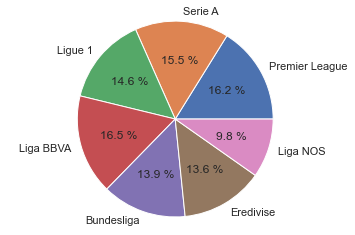

In [22]:
valores = [PLf+PLc,Sf+Sc,L1f+L1c,Esf+Esc,Bf+Bc,ERf+ERc,Pf+Pc]
nombres = ["Premier League","Serie A","Ligue 1","Liga BBVA","Bundesliga","Eredivise","Liga NOS"]

plt.pie(valores, labels=nombres, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

De la gráfica anterior podemos apreciar la manera en que se distribuye el total de goles alrededor de las mejores ligas del mundo. Podemos observar que hay mucha competencia en cuanto a este estadístico puesto que no existe un claro ganador, además de haber poca diferencia entre una liga y otra. Sin embargo, con los resultados obtenidos en la grafica podemos concluir que en la Liga Española es donde se marcan mas goles, de ahi le sigue la Premier League. Por lo cual podemos inferir que los mejores atacantes estan entre estas dos ligas, puesto que entre más goles haya quiere decir que cuenta con buenos jugadores para poder marcarlos.

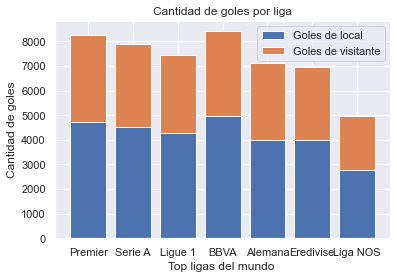

In [23]:
grupos = ["Premier","Serie A","Ligue 1","BBVA","Alemana","Eredivise","Liga NOS"]
Local = [PLf,Sf,L1f,Esf,Bf,ERf,Pf]
Visitante = [PLc,Sc,L1c,Esc,Bc,ERc,Pc]
 
indice = np.arange(len(grupos))
 
## Se crean las primeras barras
plt.bar(indice, Local, label='Goles de local')
 
## Se crean las segundas barras y se apilan sobre las primeras
plt.bar(indice, Visitante, label='Goles de visitante',  bottom=Local)
 
plt.xticks(indice, grupos)
plt.ylabel("Cantidad de goles")
plt.xlabel("Top ligas del mundo ")
plt.title('Cantidad de goles por liga')
plt.legend()
 
plt.show()

Del grafico anterior podemos obtener información relevante acerca de la cantidad de goles y su distribución (goles de local o goles de visitante) en las mejores ligas del mundo. Como pudimos observar anteriormente en la gráfica de pastel nuestra liga con mas goles es la Española con un total de 8412. En dónde, alrededor de 5000 goles fueron de local y el resto de visitante. Por otro lado, la Premier League la cantidad de goles fue de 8240, aproximadamente 4700 de local mientras que el resto de visitante. Como conclusión, en la liga española el 59.43% de los equipos marca de local mientras que el 40.57% marca de visita. Por otro lado, en la Premier League el 57.22% de los equipos marca de local y 42.78% de visita. Esto puede ser debido al apoyo de la afición hacia el equipo local y a la presión que ejercen los mismos aficionados al equipo rival haciendo que se desconcentren o simplemente como dicen coloquialmente "haciendo el papel del jugador numero 12"

<AxesSubplot:ylabel='Frequency'>

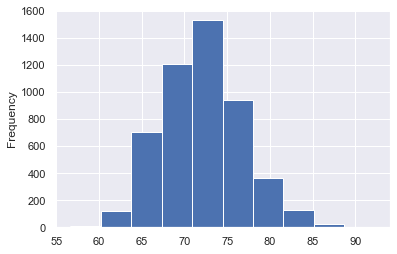

In [24]:
base_jugadores_totales[base_jugadores_totales['Calificacion Promedio']<100]['Calificacion Promedio'].plot.hist()

Ahora centrándonos un poco más en los jugadores de manera individual, realizamos este histograma para poder analizar las calificaciones generales de cada jugador. Es decir, cada jugar esta evaluado segun su definición, velocidad, regate, control de balón,etc. Mientras más alta sea su calificación general quiere decir que el jugador esta valorado como uno de los mejores del mundo. Del histograma anterior podemos observar que la calificacion general de la mayoría de los jugadores en las ligas estudiadas ronda entre 70 y 75. Sin embargo, esos no nos interesan a nosotros ya que buscamos al mejor o a los mejores, los cuales según el histograma cuentan con una calificacion general mayor a 85.

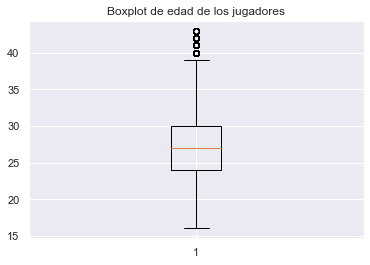

In [25]:
#Grafica de bigotes que nos da informacion acerca de la edad de los jugadores
Data=base_soccer['Edad']

plt.boxplot(Data)
plt.title("Boxplot de edad de los jugadores")
plt.show()

Del boxplot anterior podemos obtener cierta información relevante de nuestros jugadores a estudiar. Esto puede ser como el intervalo de edad desde que empiezan su carrera futbolistica hasta llegar a su retiro. Como sabemos, mucho de los futbolistas empiezan a jugar desde muy jóvenes y según nuestro boxplot, la edad más jóven con la que un jugador empezo su carrera es de aproximadamente 16 años. Mientras que la edad más vieja en la cual un jugador se retiro es aproximadamente de 39 años de edad. Otro dato que podemos obtener del gráfico es el promedio de edad el cual se encuentra alrededor de los 27 años de edad.

No handles with labels found to put in legend.


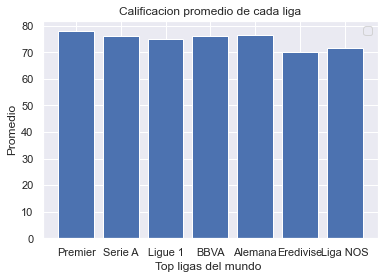

In [26]:
grupos = ["Premier","Serie A","Ligue 1","BBVA","Alemana","Eredivise","Liga NOS"]
Datos = [PL1,S,L1,Es,B,E,P]
indice = np.arange(len(grupos))

## Se crean las primeras barras
plt.bar(indice, Datos)

 
plt.xticks(indice, grupos)
plt.ylabel("Promedio")
plt.xlabel("Top ligas del mundo ")
plt.title('Calificacion promedio de cada liga')
plt.legend()
 
plt.show()

Del grafico anterior podemos observar que en general estas 7 ligas son las mejores del mundo puesto que su calificación general de cada una de ellas es superior a 70. Lo cual nos dice que existe una competencia elevada en cada de ellas y ademas cuenta con excelentes jugadores para poder tener dicha calificación. De la gráfica podemos inferir que la liga con mas competencia entre clubes es la Premier League ya que cuenta con el promedio general mas alto de liga, esto quiere decir que no existe una gran diferencia de nivel entre un club y otro. Esto se pudiera afirmar con el caso del Leceister City, un equipo recién ascendido que se coronó campeon de Liga en 2016, algo que nadie lo daba por visto, pero gracias a esto se confirmo que en la Premier League cualquier equipo puede resultar victorioso. Es por ello, que al buscar cuál liga es la mejor, la Premier League es una de las grandes candidatas.

## Conclusión  
Tras haber realizado el análisis estadístico y gráfico, nos hemos dado cuenta de hacia donde probablemente se inclinen nuestros resultados. Recordemos que nuestro objetivo principal es encontrar las cualidades que destacan entre los mejores jugadores, para así poder realizar contrataciones eficientes, entonces, por ejemplo al analizar las estadísticas y gráficas acerca de los goles, son de mucho apoyo para darnos cuenta en que sectores nos estaremos enfocando más tanto para jugadores individules como para las ligas, los promedios de los jugadores nos siven mucho a la hora de compararlos. A pesar de esto no creemos que estemos listos para responder a nuestro objetivo principal, ya que hace falta un análisis más específico, lo que si podemos afirmar, es que ya quedó delimitado nuestro grupo de interés (jugadores con +85 de cal. general) . Los objetivos secundarios sí, ya que como vimos gráficamente la liga más competitiva de acuerod a los jugadores que juegan en ella es la Premier League (Liga inglesa) y el promedio de eedad de los jugadores es de 26 años. Por otra parte, nuestra estrategia para usar la base de datos dio un giro, esto debido a que con las estadísticas analizadas y colocadas en la nueva base de datos con registros de jugadores y partidos únicos, nos facilitará el trabajo que teníamos pensado hacer en un inicio.

<a id="8"></a> <br>
## Técnica de minería

La técnica de Kmedias nos será útil ya que, si bien buscamos identificar a los mejores jugadores del mundo, para así analizar sus cualidades, en nuestra base de datos que hemos trabajado no se nos agrupan por posiciones, es decir, probablemente los jugadores con mayores calificaciónes serán los delanteros, cosa que sesgaría nuestro análisis.  
  
Al aplicar la técnica agruparemos a los jugadores en 4 posiciones:
* Porteros
* Defensas
* Centrocampistas
* Delanteros  

Esto es posible ya que cada posición cuenta con características similares. Con esto podremos terminar nuestro objetivo que era encontrar las características de los mejores jugadores según la posición.

In [25]:
#Partimos de nuestra base de datos con los registros totales por jugador
Base_Jugadores_Unicos=pd.read_table(dire+'Base Estadisticas de Jugadores.csv', sep=',')
Base_Jugadores_Unicos

,Unnamed: 0,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,...,POR_POS,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie
0,0,30726,0.000000,83.632184,1.574713,198,17.793103,16.103448,17.057471,27.000000,...,91.149425,78.356322,0,0,2,0,38,41,Edwin van der Sar,right
1,1,30362,0.049505,76.073267,1.544554,185,59.455446,22.089109,73.762376,64.237624,...,10.415842,12.940594,5,97,14,0,29,37,Wes Brown,right
2,2,30620,0.007519,84.295614,1.353383,193,45.000000,39.000000,85.451128,74.631579,...,12.691729,9.849624,1,41,11,0,30,37,Rio Ferdinand,right
3,3,30865,0.080247,86.548560,1.462963,190,38.987654,37.129630,90.895062,68.888889,...,13.302469,12.049383,13,183,34,4,27,34,Nemanja Vidic,right
4,4,32569,0.040323,82.823925,1.370968,175,78.516129,43.766129,72.931452,80.056452,...,13.580645,9.463710,10,248,32,1,27,35,Patrice Evra,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,5033,498033,0.121212,74.015152,NaN,177,74.212121,62.818182,46.606061,78.818182,...,11.606061,9.606061,4,38,3,0,19,20,Marco Asensio,left
5034,5034,484906,0.192308,68.623077,NaN,167,59.692308,66.846154,27.692308,76.692308,...,7.692308,13.692308,5,24,2,0,25,26,Tana,right
5035,5035,535600,0.037037,74.098765,NaN,180,62.185185,52.592593,57.000000,76.592593,...,10.000000,14.000000,1,53,8,1,26,27,Petros,right
5036,5036,495841,0.238095,68.142857,NaN,182,42.857143,72.428571,68.714286,59.428571,...,8.000000,6.000000,5,54,8,0,18,19,Adalberto Penaranda,right


In [26]:
#Filtramos la base para tener solo clificaciones arriba de 75
i=0
while i<=5037:
    if Base_Jugadores_Unicos['Calificacion Promedio'][i]<75:
        Base_Jugadores_Unicos=Base_Jugadores_Unicos.drop([i],axis=0)
    i=i+1
Base_Jugadores_Unicos

,Unnamed: 0,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,...,POR_POS,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie
0,0,30726,0.000000,83.632184,1.574713,198,17.793103,16.103448,17.057471,27.000000,...,91.149425,78.356322,0,0,2,0,38,41,Edwin van der Sar,right
1,1,30362,0.049505,76.073267,1.544554,185,59.455446,22.089109,73.762376,64.237624,...,10.415842,12.940594,5,97,14,0,29,37,Wes Brown,right
2,2,30620,0.007519,84.295614,1.353383,193,45.000000,39.000000,85.451128,74.631579,...,12.691729,9.849624,1,41,11,0,30,37,Rio Ferdinand,right
3,3,30865,0.080247,86.548560,1.462963,190,38.987654,37.129630,90.895062,68.888889,...,13.302469,12.049383,13,183,34,4,27,34,Nemanja Vidic,right
4,4,32569,0.040323,82.823925,1.370968,175,78.516129,43.766129,72.931452,80.056452,...,13.580645,9.463710,10,248,32,1,27,35,Patrice Evra,left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,4998,294003,0.275862,77.077011,NaN,172,66.724138,81.068966,68.172414,76.000000,...,7.275862,11.275862,8,44,7,0,21,23,Luciano Dario Vietto,right
5006,5006,245555,0.000000,77.101478,NaN,187,19.241379,20.275862,19.241379,31.344828,...,75.327586,80.982759,0,3,9,0,22,24,Geronimo Rulli,right
5008,5008,194660,0.454545,76.653535,NaN,180,71.000000,76.309091,61.963636,77.618182,...,9.345455,9.345455,25,59,9,0,26,28,Lucas Perez,left
5024,5024,541557,0.181818,75.863636,NaN,177,78.181818,74.090909,47.181818,74.000000,...,12.545455,8.545455,6,28,4,0,24,25,Jony,left


In [27]:
#Eliminamos las columnas que no son sobre las cualidades de los jugadores
del(Base_Jugadores_Unicos['Unnamed: 0'])
base=Base_Jugadores_Unicos.copy()
del(base['ID'])
del(base['Nombre'])
del(base['Pie'])
del(base['Goles'])
del(base['Win rate'])
del(base['1raAmarilla'])
del(base['2daAmarilla'])
del(base['Faltas'])
del(base['Goles Promedio'])
del(base['Calificacion Promedio'])
del(base['Edad Minima'])
del(base['Edad Maxima'])
base

,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,Precision,PaseLargo,...,Vision,Penales,Marcaje,Entrada,Barridas,POR_EST,POR_PA,POR_DES,POR_POS,POR_REF
0,198,17.793103,16.103448,17.057471,27.000000,12.000000,17.229885,12.000000,11.000000,63.666667,...,40.000000,42.459770,17.057471,20.310345,11.000000,83.413793,85.931034,85.000000,91.149425,78.356322
1,185,59.455446,22.089109,73.762376,64.237624,31.039604,52.752475,44.752475,24.039604,56.821782,...,52.405941,45.247525,78.712871,78.544554,76.871287,12.930693,13.782178,21.376238,10.415842,12.940594
2,193,45.000000,39.000000,85.451128,74.631579,51.000000,58.225564,51.000000,27.000000,72.406015,...,60.691729,64.751880,85.849624,90.187970,85.714286,12.661654,12.691729,24.135338,12.691729,9.849624
3,190,38.987654,37.129630,90.895062,68.888889,39.987654,46.024691,42.790123,45.753086,62.370370,...,58.259259,64.907407,87.728395,90.740741,84.135802,11.043210,11.512346,32.555556,13.302469,12.049383
4,175,78.516129,43.766129,72.931452,80.056452,52.802419,78.588710,73.120968,50.802419,74.056452,...,67.028226,61.895161,80.439516,84.161290,88.350806,11.850806,14.008065,24.653226,13.580645,9.463710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,172,66.724138,81.068966,68.172414,76.000000,76.965517,82.448276,74.724138,70.000000,60.103448,...,71.275862,69.000000,32.000000,44.000000,37.931034,13.275862,13.275862,7.275862,7.275862,11.275862
5006,187,19.241379,20.275862,19.241379,31.344828,20.620690,20.275862,22.293103,22.637931,22.344828,...,35.189655,24.672414,20.620690,19.586207,20.965517,79.362069,74.362069,69.344828,75.327586,80.982759
5008,180,71.000000,76.309091,61.963636,77.618182,73.309091,78.000000,79.690909,78.763636,71.345455,...,75.963636,73.690909,23.345455,23.345455,25.345455,13.345455,7.345455,7.345455,9.345455,9.345455
5024,177,78.181818,74.090909,47.181818,74.000000,57.363636,73.545455,78.727273,70.090909,71.636364,...,74.727273,59.545455,41.090909,50.545455,46.909091,10.545455,15.545455,12.545455,12.545455,8.545455


In [28]:
#Aquellos registros faltantes seran llenados con 0
base=base.fillna(0)

In [29]:
#Normalizacion de los datos
basenorm=(base-base.min())/(base.max()-base.min())
basenorm

,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,Precision,PaseLargo,...,Vision,Penales,Marcaje,Entrada,Barridas,POR_EST,POR_PA,POR_DES,POR_POS,POR_REF
0,0.883721,0.193248,0.174286,0.183917,0.282464,0.132074,0.178414,0.130225,0.117299,0.672433,...,0.416942,0.460109,0.188828,0.223828,0.116848,0.921743,0.999198,0.957866,1.000000,0.853579
1,0.581395,0.645735,0.239069,0.795321,0.672031,0.341627,0.546246,0.485658,0.256346,0.600139,...,0.546256,0.490318,0.871360,0.865593,0.816567,0.142887,0.160258,0.240889,0.114272,0.140969
2,0.767442,0.488737,0.422094,0.921351,0.780769,0.561315,0.602920,0.553457,0.287915,0.764736,...,0.632624,0.701674,0.950365,0.993908,0.910502,0.139914,0.147578,0.271981,0.139241,0.107297
3,0.697674,0.423438,0.401851,0.980049,0.720691,0.440111,0.476581,0.464362,0.487888,0.658742,...,0.607269,0.703359,0.971163,1.000000,0.893734,0.122030,0.133864,0.366869,0.145941,0.131261
4,0.348837,0.852750,0.473677,0.786361,0.837522,0.581153,0.813778,0.793515,0.541732,0.782167,...,0.698673,0.670717,0.890474,0.927492,0.938508,0.130954,0.162884,0.277817,0.148993,0.103093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,0.279070,0.724679,0.877403,0.735049,0.795085,0.847096,0.853743,0.810913,0.746445,0.634799,...,0.742948,0.747708,0.354244,0.484898,0.402923,0.146702,0.154370,0.081992,0.079823,0.122834
5006,0.627907,0.208977,0.219444,0.207464,0.327918,0.226955,0.209954,0.241927,0.241400,0.236001,...,0.366802,0.267359,0.228273,0.215848,0.222707,0.876971,0.864675,0.781447,0.826419,0.882190
5008,0.465116,0.771118,0.825887,0.668104,0.812014,0.806852,0.807682,0.864813,0.839897,0.753534,...,0.791812,0.798540,0.258437,0.257276,0.269233,0.147471,0.085412,0.082776,0.102529,0.101805
5024,0.395349,0.849119,0.801880,0.508724,0.774161,0.631354,0.761555,0.854355,0.747415,0.756607,...,0.778924,0.645255,0.454881,0.557032,0.498293,0.116530,0.180761,0.141375,0.137636,0.093090


In [30]:
#Echamos un vistazo a los datos
basenorm.describe()

,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,Dribbling,Efecto,Precision,PaseLargo,...,Vision,Penales,Marcaje,Entrada,Barridas,POR_EST,POR_PA,POR_DES,POR_POS,POR_REF
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,...,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.504942,0.666182,0.617197,0.680746,0.729648,0.626161,0.674761,0.639107,0.597024,0.683393,...,0.690141,0.694531,0.542185,0.588631,0.528321,0.189708,0.235072,0.358684,0.221167,0.225632
std,0.156439,0.214419,0.234663,0.209656,0.167371,0.246305,0.213541,0.245737,0.222448,0.145622,...,0.179884,0.163737,0.276399,0.273125,0.275267,0.242666,0.232132,0.234587,0.222732,0.234881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395349,0.575066,0.440747,0.601957,0.708263,0.475125,0.584930,0.499482,0.469194,0.605246,...,0.622751,0.625050,0.255562,0.319592,0.264649,0.085767,0.127907,0.172730,0.118889,0.116259
50%,0.511628,0.739058,0.685230,0.731290,0.776280,0.708259,0.753679,0.726210,0.653023,0.717691,...,0.740176,0.737025,0.533317,0.595851,0.515247,0.110503,0.163582,0.300851,0.152523,0.154248
75%,0.627907,0.821208,0.804152,0.830927,0.827585,0.816394,0.824849,0.824388,0.765375,0.787564,...,0.812767,0.810008,0.830130,0.863484,0.809989,0.139599,0.200499,0.467652,0.187715,0.188607
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#Entrenamos al algoritmo y lo aplicamos en nuestra base de datos normalizados
#El numero de clusters son 4, ya que buscamos agruparlos en las 4 posiciones ya mencionadas
clustering=KMeans(n_clusters=4,max_iter=2500)
clustering.fit(basenorm)

KMeans(max_iter=2500, n_clusters=4)

In [32]:
#Añadimos la columna a nuestra base original
Base_Jugadores_Unicos["KMedias"]=clustering.labels_

El algoritmo los agrupó de la siguiente manera:  
* 0-Delanteros
* 1-Centrocampistas
* 2-Defensas
* 3-Porteros  

**La columna se encuentra al final de la tabla.**  
  
Y con esto, tenemos el objetivo de nuestro trabajo casi completado, solo restaría aplicar una condicional para hallar a los mejores 5 jugadores de cada grupo para cer sus características, y así, concluir nuestro análisis.

In [33]:
Base_Jugadores_Unicos.to_csv("Base Final.csv")
Base_Jugadores_Unicos.head(15)

,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,...,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie,KMedias
0,30726,0.000000,83.632184,1.574713,198,17.793103,16.103448,17.057471,27.000000,12.000000,...,78.356322,0,0,2,0,38,41,Edwin van der Sar,right,3
1,30362,0.049505,76.073267,1.544554,185,59.455446,22.089109,73.762376,64.237624,31.039604,...,12.940594,5,97,14,0,29,37,Wes Brown,right,2
2,30620,0.007519,84.295614,1.353383,193,45.000000,39.000000,85.451128,74.631579,51.000000,...,9.849624,1,41,11,0,30,37,Rio Ferdinand,right,2
3,30865,0.080247,86.548560,1.462963,190,38.987654,37.129630,90.895062,68.888889,39.987654,...,12.049383,13,183,34,4,27,34,Nemanja Vidic,right,2
4,32569,0.040323,82.823925,1.370968,175,78.516129,43.766129,72.931452,80.056452,52.802419,...,9.463710,10,248,32,1,27,35,Patrice Evra,left,1
5,24148,0.084967,77.887488,1.346405,182,76.294118,65.712418,81.542484,83.718954,61.568627,...,13.065359,13,125,19,1,24,32,Darren Fletcher,right,1
6,34944,0.067010,81.362543,1.262887,187,76.097938,62.618557,72.706186,86.458763,67.000000,...,11.288660,13,114,21,0,27,35,Michael Carrick,right,1
7,30373,0.144737,82.739130,1.342105,170,81.811594,65.956522,73.521739,90.318841,85.000000,...,14.521739,11,107,24,1,34,39,Paul Scholes,right,1
8,24154,0.139535,82.118217,1.244186,177,88.255814,75.976744,64.162791,84.872093,80.790698,...,11.418605,12,76,9,0,35,41,Ryan Giggs,left,0
10,30829,0.596413,87.360314,1.336323,175,78.852018,88.937220,78.134529,83.757848,88.681614,...,10.421525,133,224,42,0,23,31,Wayne Rooney,right,0


### Métrica de evaluación

Hay diferentes métricas de evaluación para esta técnica que evaluan lógicamente diferentes aspectos que siguen los datos,de entre todas ellas, una de las más usadas es el índice de Silhouete, que está dado por la siguiente fórmula: 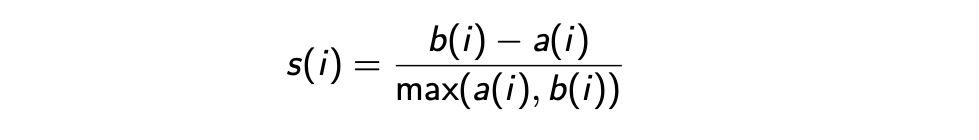
El valor del índice de Silhouette varía de -1 a 1. Si la puntuación es cercana 1, el grupo es denso y está bien separado que otros grupos. Un valor cercano a 0 representa grupos superpuestos con muestras muy cercanas al límite de decisión de los grupos vecinos. Una puntuación negativa [-1, 0] indica que las muestras pueden haber sido asignadas a grupos incorrectos.

In [34]:
from sklearn.metrics import silhouette_score
clustering.fit_predict(X) #Ajustamos los datos de los cluster
# Calculamos el coeficiente de Silhouette
score = silhouette_score(X, clustering.labels_, metric='euclidean')
# Imprimimos el resultado
print('Silhouetter Score:',  score)

Silhouetter Score: 0.4980505049972866


Un resultado de 0.4980505049972867 nos indica que el agrupamiento fue hecho de una manera si bien no perfecta, es aceptable, ya que tampoco se encuentra cercano al 0, por lo que podemos decir que nuestro agrupamiento está correcto. Esto pasa debido a las características de los jugadores, ya que debido a que se evaluaron 34 condiciones, es complicado que el código las separe de manera perfecta, puesto que en algún punto las características entre jugadores son muy similares no obstante pueden pertenecer a diferentes posiciones a las asignadas. A pesar de esto, a continuación veremos que nuestros datos si fueron agrupados de manera correcta, almenos en la mayoría, por lo que nuestro trabajo es bueno.

### Conlusión de técnicas de minería  
La ténica de agrupación por k-medias nos permitió dividir los items en grupos menos masivos, con características similares, de tal manera que fuera más sencillo trabajar con ellos y que los elementos descriptivos de su análisis estadístico fueran más representativos. Estos elementos resultan muy útiles para llegar a nuestro objetivo, puesto que permite elegir los criterios que necesitamos por posición, siendo que al momento de contratar a los jugadores nuevos, las vacantes se abren justamente por posición, y no de manera general.

<a id="9"></a> <br>
## Resultados Finales

Crearemos una última base de datos, con los 5 mejores jugadores de acuerdo a la calificación obtenida por posición. Con estos datos, se calculará un promedio de sus cualidades, donde un promedio mayor o igual a 87 nos indica que es algo vital, entre 84 y 87 algo relevante, entre 80 y 84 es algo que es deseable, y menor a 80 es insignificante para el jugador. El orden indica que debemos de priorizar en el jugador que buscamos.

In [34]:
#Mejores Porteros
port = Base_Jugadores_Unicos[Base_Jugadores_Unicos['KMedias'] == 3]
port=port.sort_values('Calificacion Promedio',ascending=False)
port=port.head(5)
port 

,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,...,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie,KMedias
4442,30657,0.000000,87.805603,1.906250,185,16.530172,14.875000,18.512931,21.000000,12.508621,...,91.797414,0,1,8,0,27,35,Iker Casillas,left,3
2019,27299,0.003922,86.137255,1.266667,193,18.145098,17.647059,20.074510,36.913725,12.450980,...,87.200000,1,4,7,0,22,30,Manuel Neuer,right,3
2587,30717,0.000000,85.643579,1.367965,193,19.329004,16.870130,18.606061,35.073593,18.255411,...,84.216450,0,4,2,0,30,38,Gianluigi Buffon,right,3
689,30989,0.004950,85.093750,1.405941,185,19.401042,17.276042,24.250000,45.671875,17.296875,...,87.375000,1,5,6,0,29,37,Julio Cesar,left,3
181,30859,0.003984,85.087649,1.231076,195,19.741036,15.378486,19.741036,29.342629,17.653386,...,86.752988,1,1,2,0,26,34,Petr Cech,left,3


Vemos que los mejores defensas de acuerdo con las estadísticas son:

1. Iker Casillas (España)
2. Manuel Neuer (Alemania)
3. Gianluigi Buffon (Italia)
4. Julio Cesar (Brasil)
5. Petr Cech (República Checa)

<ipython-input-35-52537ee8d8d8>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


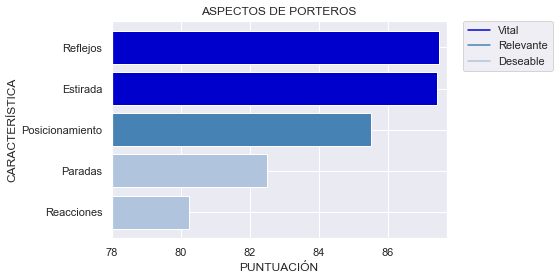

In [35]:
Colp=port.columns.values
carp=pd.DataFrame(port[Colp].mean())
vit=[]
vitd=[]
rel=[]
reld=[]
des=[]
desd=[]
i=5
while i<38:
    if float(carp.iloc[i].values)>=87:
        vit.append(carp.index.values[i])
        vitd.append(float(carp.iloc[i].values))
    if float(carp.iloc[i].values)>=84 and float(carp.iloc[i].values)<87:
        rel.append(carp.index.values[i])
        reld.append(float(carp.iloc[i].values))
    if float(carp.iloc[i].values)>=80 and float(carp.iloc[i].values)<84:
        des.append(carp.index.values[i])
        desd.append(float(carp.iloc[i].values))
    i=i+1
#Graficamos
## Declaramos valores para el eje y, en este caso son categorias
eje_x = ['Reacciones','Paradas','Posicionamiento','Estirada','Reflejos']
 
## Declaramos valores para el eje x, ahora son los valores
eje_y = desd+reld+vitd
 
## Creamos Gráfica 
etiqueta=['Vital','Relevante','Deseable']
colores=['lightsteelblue','steelblue','mediumblue']
plt.barh(eje_x, eje_y, color=['lightsteelblue','lightsteelblue','steelblue','mediumblue','mediumblue'])
plt.ylabel('CARACTERÍSTICA')
plt.xlabel('PUNTUACIÓN')
plt.title('ASPECTOS DE PORTEROS')
axes = plt.axes()
axes.set_xlim([78, 87.7])
plt.plot([1,2,3], label="Vital",color='mediumblue')
plt.plot([3,2,1], label="Relevante",color='steelblue')
plt.plot([2,2,1], label="Deseable",color='lightsteelblue')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Vemos que para los porteros, nuestras características vitales a la hora de analizar a un jugador son los reflejos y la estirada, que junto a un buen posicionamiento, paradas y reacciones, conforman los aspectos a fijarse en un portero.

In [36]:
#Mejores Defensas
defe= Base_Jugadores_Unicos[Base_Jugadores_Unicos['KMedias'] == 2]
defe=defe.sort_values('Calificacion Promedio',ascending=False)
defe=defe.fillna(1.5528928)
defe=defe.head(5)
defe

,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,...,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie,KMedias
4510,30661,0.078947,86.964912,1.552893,177,59.315789,37.491228,84.245614,74.684211,44.000000,...,15.631579,9,64,19,0,30,36,Carles Puyol,right,2
3,30865,0.080247,86.548560,1.462963,190,38.987654,37.129630,90.895062,68.888889,39.987654,...,12.049383,13,183,34,4,27,34,Nemanja Vidic,right,2
184,30627,0.111111,84.951440,1.234568,187,46.625514,46.000000,91.884774,63.954733,55.000000,...,12.316872,27,144,37,2,28,36,John Terry,right,2
2720,41884,0.075221,84.946318,1.318584,187,65.951327,38.907080,81.433628,63.884956,45.252212,...,11.831858,17,168,40,1,24,32,Giorgio Chiellini,left,2
2,30620,0.007519,84.295614,1.353383,193,45.000000,39.000000,85.451128,74.631579,51.000000,...,9.849624,1,41,11,0,30,37,Rio Ferdinand,right,2


Vemos que los mejores defensas de acuerdo con las estadísticas son:

1. Carles Puyol (España)
2. Nemanja Vidic (Serbia)
3. John Terry (Inglaterra)
4. Giorgio Chiellini (Italia)
5. Rio Ferdinand (Inglaterra)

<ipython-input-37-bd1c6f4f3495>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


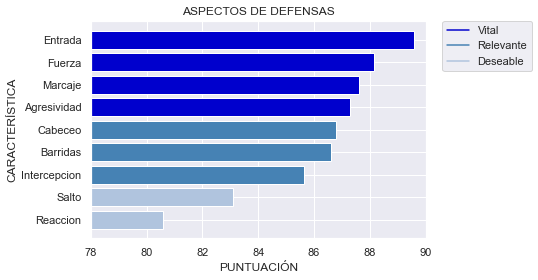

In [37]:
Colp=defe.columns.values
cardf=pd.DataFrame(defe[Colp].mean())
vit=[]
vitd=[]
rel=[]
reld=[]
des=[]
desd=[]
i=5
while i<38:
    if float(cardf.iloc[i].values)>=87:
        vit.append(cardf.index.values[i])
        vitd.append(float(cardf.iloc[i].values))
    if float(cardf.iloc[i].values)>=84 and float(cardf.iloc[i].values)<87:
        rel.append(cardf.index.values[i])
        reld.append(float(cardf.iloc[i].values))
    if float(cardf.iloc[i].values)>=80 and float(cardf.iloc[i].values)<84:
        des.append(cardf.index.values[i])
        desd.append(float(cardf.iloc[i].values))
    i=i+1
#Graficamos
## Declaramos valores para el eje y, en este caso son categorias
eje_x =des+['Intercepcion', 'Barridas', 'Cabeceo']+['Agresividad','Marcaje', 'Fuerza', 'Entrada']
 
## Declaramos valores para el eje x, ahora son los valores
eje_y =desd+sorted(reld)+sorted(vitd)
 
## Creamos Gráfica 
plt.barh(eje_x, eje_y, color=['lightsteelblue','lightsteelblue','steelblue','steelblue','steelblue','mediumblue','mediumblue','mediumblue','mediumblue'])
plt.ylabel('CARACTERÍSTICA')
plt.xlabel('PUNTUACIÓN')
plt.title('ASPECTOS DE DEFENSAS')
axes = plt.axes()
axes.set_xlim([78, 90])
plt.plot([1,2,3], label="Vital",color='mediumblue')
plt.plot([3,2,1], label="Relevante",color='steelblue')
plt.plot([2,2,1], label="Deseable",color='lightsteelblue')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Vemos que para los defensas, nuestras características vitales son la entrada con una gran diferencia, por lo que es induscutible esta sobre todos los demás aspectos, también es importante la fuerza y el marcaje, lo relevante es el cabeceo (ya que los defensas centrales son caracterizados por rematar en los tiros de esquina), las barridas y las intercepciones. Esto junto al salto y las reacciones son los que debemos de considerar si buscamos un defensa.

In [38]:
#Mejores Centrocampistas
cen= Base_Jugadores_Unicos[Base_Jugadores_Unicos['KMedias'] == 1]
cen=cen.sort_values('Calificacion Promedio',ascending=False)
cen=cen.fillna(1.5528928)
cen=cen.head(5)
cen

,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,...,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie,KMedias
4512,30955,0.115789,88.354885,1.552893,170,84.252874,72.798851,54.333333,94.051724,74.00000,...,10.540230,22,96,16,0,24,32,Andres Iniesta,right,1
4511,39854,0.164021,88.052645,1.552893,170,88.142857,73.756614,55.253968,95.587302,68.26455,...,13.666667,31,58,17,0,28,35,Xavi Hernandez,right,1
1837,30894,0.049550,86.549550,1.346847,170,85.270270,40.972973,64.567568,86.851351,66.00000,...,10.027027,11,54,14,0,25,33,Philipp Lahm,right,1
216,30613,0.267281,86.489401,1.433824,175,84.055300,78.096774,69.414747,92.732719,81.00000,...,16.313364,58,187,48,0,21,29,Cesc Fabregas,right,1
4498,30962,0.130802,85.833333,1.552893,182,75.430380,57.113924,87.810127,77.105485,56.71730,...,13.227848,31,295,91,5,22,30,Sergio Ramos,right,1


Vemos que los mejores centrocampistas de acuerdo con las estadísticas son:

1. Andres Iniesta (España)
2. Xavi Hernández (España)
3. Philip Lahm (Alemania)
4. Cesc Fábregas (España)
5. Sergio Ramos (España)

<ipython-input-39-0eb34006dfb1>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


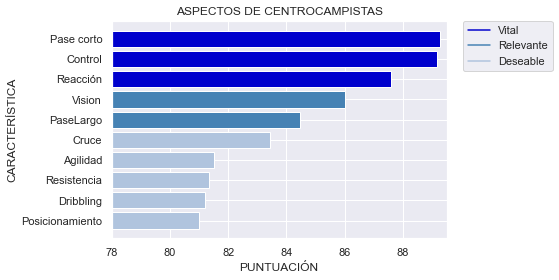

In [39]:
Colp=cen.columns.values
carc=pd.DataFrame(cen[Colp].mean())
vit=[]
vitd=[]
rel=[]
reld=[]
des=[]
desd=[]
i=5
while i<38:
    if float(carc.iloc[i].values)>=87:
        vit.append(carc.index.values[i])
        vitd.append(float(carc.iloc[i].values))
    if float(carc.iloc[i].values)>=84 and float(carc.iloc[i].values)<87:
        rel.append(carc.index.values[i])
        reld.append(float(carc.iloc[i].values))
    if float(carc.iloc[i].values)>=80 and float(carc.iloc[i].values)<84:
        des.append(carc.index.values[i])
        desd.append(float(carc.iloc[i].values))
    i=i+1
#Graficamos
## Declaramos valores para el eje y, en este caso son categorias
eje_x = ['Posicionamiento', 'Dribbling', 'Resistencia', 'Agilidad','Cruce']+rel+['Reacción','Control','Pase corto']
 
## Declaramos valores para el eje x, ahora son los valores
eje_y = sorted(desd)+reld+sorted(vitd)
 
## Creamos Gráfica 
plt.barh(eje_x, eje_y, color=['lightsteelblue','lightsteelblue','lightsteelblue','lightsteelblue','lightsteelblue','steelblue','steelblue','mediumblue','mediumblue','mediumblue'])
plt.ylabel('CARACTERÍSTICA')
plt.xlabel('PUNTUACIÓN')
plt.title('ASPECTOS DE CENTROCAMPISTAS')
axes = plt.axes()
axes.set_xlim([78, 89.5])
plt.plot([1,2,3], label="Vital",color='mediumblue')
plt.plot([3,2,1], label="Relevante",color='steelblue')
plt.plot([2,2,1], label="Deseable",color='lightsteelblue')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Vemos que para los centrocampistas son más nuestras características en general, esto debido a que usualmente son los jugadores más completos, las vitales son el pase corto, el control del balón y las reacciones, y si le sumamos una buena visión y un buen pase largo, y las demás características en la gráfica, conforman los aspectos a tomar en cuenta cuando se busca un centrocampista.

In [40]:
#Mejores Delanteros
dela= Base_Jugadores_Unicos[Base_Jugadores_Unicos['KMedias'] == 0]
dela=dela.sort_values('Calificacion Promedio',ascending=False)
dela=dela.head(5)
dela=dela.fillna(1.5528928)
dela

,ID,Goles Promedio,Calificacion Promedio,Win rate,Estatura,Cruce,Finalizacion,Cabeceo,PaseCorto,Voleas,...,POR_REF,Goles,Faltas,1raAmarilla,2daAmarilla,Edad Minima,Edad Maxima,Nombre,Pie,KMedias
4513,30981,1.132530,92.288651,1.552893,170,83.400881,92.396476,69.303965,88.819383,87.696035,...,10.854626,282,124,23,0,21,29,Lionel Messi,left,0
204,30893,1.108108,91.130417,1.612903,185,84.037500,91.345833,86.112500,82.287500,85.433333,...,13.354167,287,159,35,2,23,31,Cristiano Ronaldo,right,0
2006,30924,0.366906,88.219424,1.503597,170,85.748201,78.151079,49.733813,87.776978,82.568345,...,12.410072,51,74,20,2,25,33,Franck Ribery,right,0
1572,35724,0.863830,88.216895,1.188679,195,74.009132,89.872146,78.187215,85.817352,89.803653,...,15.260274,203,273,42,0,27,35,Zlatan Ibrahimovic,right,0
2163,30834,0.553957,87.696403,1.043860,180,83.014388,81.841727,52.381295,84.482014,84.316547,...,16.762590,77,67,8,1,24,32,Arjen Robben,left,0


Vemos que los mejores defensas de acuerdo con las estadísticas son:

1. Lionel Messi (Argentina)
2. Cristiano Ronaldo (Portugal)
3. Franck Ribery (Francia)
4. Zlatan Ibrahimovic (Suecia)
5. Arjen Robben (Holanda)

<ipython-input-41-a6055d57a9ac>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.axes()


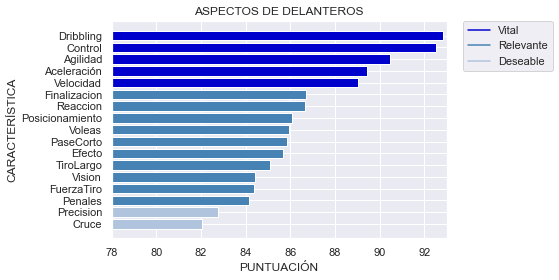

In [41]:
Colp=dela.columns.values
carde=pd.DataFrame(dela[Colp].mean())
vit=[]
vitd=[]
rel=[]
reld=[]
des=[]
desd=[]
i=5
while i<38:
    if float(carde.iloc[i].values)>=87:
        vit.append(carde.index.values[i])
        vitd.append(float(carde.iloc[i].values))
    if float(carde.iloc[i].values)>=84 and float(carde.iloc[i].values)<87:
        rel.append(carde.index.values[i])
        reld.append(float(carde.iloc[i].values))
    if float(carde.iloc[i].values)>=80 and float(carde.iloc[i].values)<84:
        des.append(carde.index.values[i])
        desd.append(float(carde.iloc[i].values))
    i=i+1
#Graficamos
## Declaramos valores para el eje y, en este caso son categorias
eje_x =des+['Penales','FuerzaTiro','Vision','TiroLargo','Efecto','PaseCorto','Voleas','Posicionamiento','Reaccion','Finalizacion']+ ['Velocidad', 'Aceleración', 'Agilidad', 'Control', 'Dribbling']
 
## Declaramos valores para el eje x, ahora son los valores
eje_y = desd+sorted(reld)+sorted(vitd)
 
## Creamos Gráfica 
plt.barh(eje_x, eje_y, color=['lightsteelblue','lightsteelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','mediumblue','mediumblue','mediumblue','mediumblue','mediumblue'])
plt.ylabel('CARACTERÍSTICA')
plt.xlabel('PUNTUACIÓN')
plt.title('ASPECTOS DE DELANTEROS')
axes = plt.axes()
axes.set_xlim([78, 93])
plt.plot([1,2,3], label="Vital",color='mediumblue')
plt.plot([3,2,1], label="Relevante",color='steelblue')
plt.plot([2,2,1], label="Deseable",color='lightsteelblue')
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Finalmente para los delanteros, observamos muchas características, dónde destacan el dribbling, control, agilidad, aceleración y velocidad como aspectos vitales, que junto a los demás nos ayudarán a encontrar a nuestro delantero perfecto. Vemos lo que se comento al incicio del proyecto, y es que los delanteros suelen tener mejores calificaciones por alguna razón, por ello destacan tantos aspectos en comparación con las demás posiciones.

<a id="10"></a> <br>
## Conclusión Final

En este trabajo vimos todo el proceso requerido para poder trabajar de manera correcta con nuestros datos, como trabajo a futuro o aspectos de mejora, lo más destacado sería poder contar con nuestra propia base de datos, es decir, adaptada a nuestra necesidades para que sea más eficaz el trabajo con la misma, con nuevas columnas como pueden ser los promedios que generamos, u otras. A su vez es importante lograr subir el valor de la métrica de evaluación para poder tener una mayor seguridad en nuestros resultados, y esto se lograr teniendo una mejor base de datos principalmente, con esto podríamos agrupar a los jugadores en posiciones más específicas, por ejemplo a los atacantes podemos dividirlos en extremos iqzquierdo y derecho, delantero central, media punta, segundo delantero, entre otras, y asi con cada uno de nuestros 3 grupos(delanteros, centrocampistas y defensas), con lo que se lograría un mejor ajuste y simplificaría el proceso de reclutamiento, puesto que ya conoceremos características más específicas del jugador de antemano.  
  
Cuando se tenga lo anterior mencionado, es cuando se podría implementar en los equipos mediante una red de reclutamiento, ya sea para buscar nuevo talento o jugadores ya desarrollados.